# Árvores de regressão



| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
import seaborn as sns
import pandas as pd
import dtreeviz
import graphviz

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns = boston.feature_names)

y = pd.DataFrame(boston.target, columns = ['MEDV'])


In [3]:

X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:

y.head()  


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.


In [5]:

X.dtypes


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


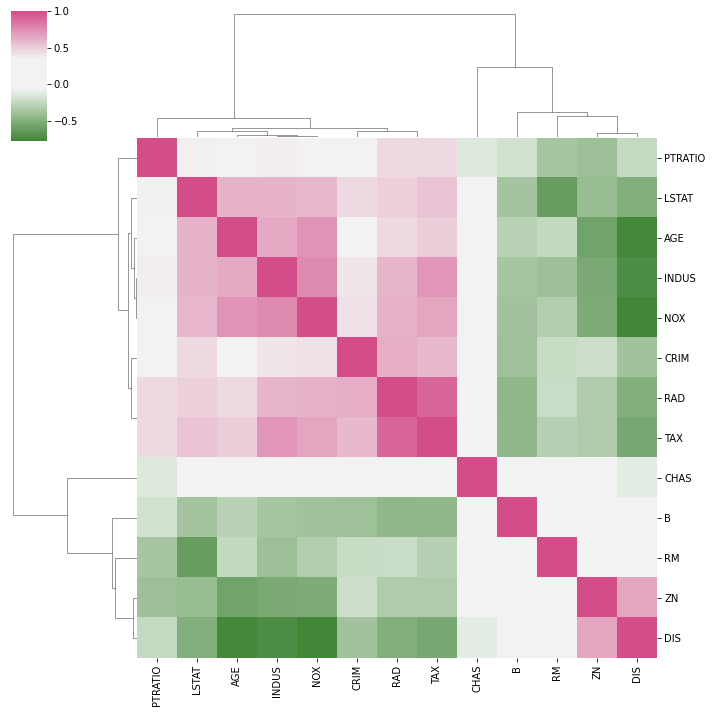

In [6]:

df_corr = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(X.corr(), figsize=(10, 10), center = 0.15, cmap=df_corr, metric="correlation");

X.corr()

# Sim --> RAD(índice de acessibilidade a rodovias radiais) X TAX(taxa de imposto sobre a propriedade de valor total) = 0.910228


### 3. Separe os dados em validação e teste

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, test_size=0.3, random_state=2360873)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

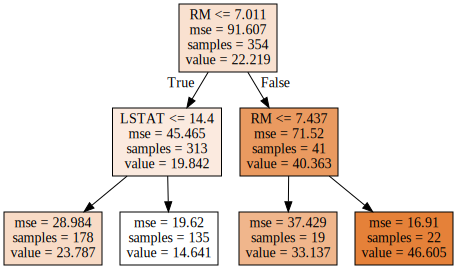

In [8]:
arvore_1 = DecisionTreeRegressor(max_depth=8)

arvore_2 = DecisionTreeRegressor(max_depth=2)

arvore_1.fit(X_train, y_train)

arvore_2.fit(X_train, y_train)

graf_arv_2 = tree.export_graphviz(arvore_2, out_file=None, feature_names=X.columns,filled=True)

plot_2 = graphviz.Source(graf_arv_2, format="png") 

plot_2


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [8]:

mse_1 = arvore_1.score(X_train, y_train)

mse_2 = arvore_2.score(X_train, y_train)

print('O R(Quadrado) da árvore com profundidade = {0} é: {1:.2f}%'.format(arvore_1.get_depth(),mse_1*100).replace(".",","))

print('O R(Quadrado) da árvore com profundidade = {0} é: {1:.2f}%'.format(arvore_2.get_depth(),mse_2*100).replace(".",","))


O R(Quadrado) da árvore com profundidade = 8 é: 98,39%
O R(Quadrado) da árvore com profundidade = 2 é: 72,58%


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [9]:

# Aparentemente a Arvore de profundidade maior --> Arvore_1


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

    --> RM = número médio de quartos por habitação

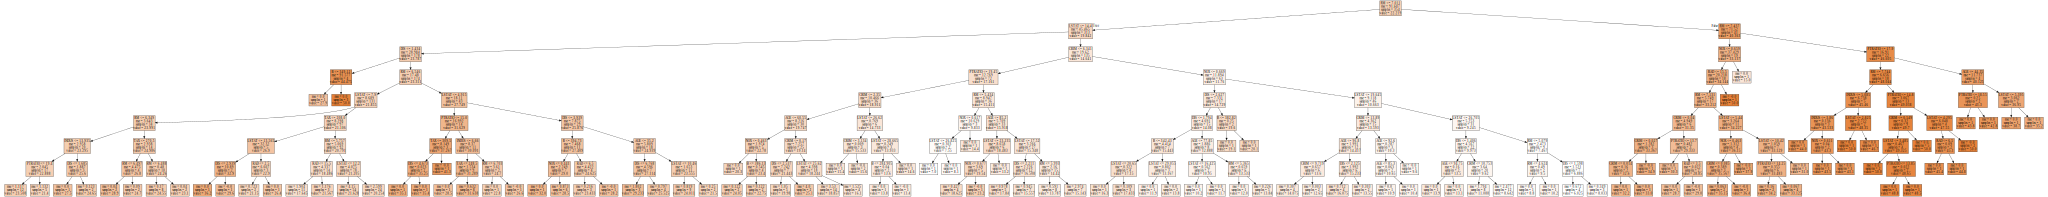

In [11]:
graf_arv_2 = tree.export_graphviz(arvore_1, out_file=None, feature_names=X.columns,filled=True)

plot_2 = graphviz.Source(graf_arv_2, format="png") 

plot_2